### [참고] <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas Cheat Sheet</a>

In [ ]:
import pandas as pd
import numpy as np

## 1. row 기준
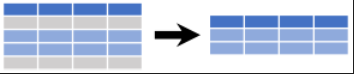

### 1) head / tail

In [ ]:
df = pd.DataFrame(
    {
        "a":[4,5,6,6,np.nan],
        "b":[7,8,np.nan,9,9],
        "c":[10,11,12,np.nan,12]
    },
    index=[1,2,3,4,5]
)
df

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0
3,6.0,NaN,12.0
4,6.0,9.0,NaN
5,NaN,9.0,12.0


In [ ]:
# head()

df.head()

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0
3,6.0,NaN,12.0
4,6.0,9.0,NaN
5,NaN,9.0,12.0


In [ ]:
df.head(2)

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0


In [ ]:
df.tail(2)

,a,b,c
4,6.0,9.0,NaN
5,NaN,9.0,12.0


### 2) sample

In [ ]:
# frac : 비율

df.sample(frac=0.5)

,a,b,c
1,4.0,7.0,10.0
5,NaN,9.0,12.0


In [ ]:
# 임의의 한 개의 행

df.sample()

,a,b,c
3,6.0,NaN,12.0


In [ ]:
# n의 개수는 전체의 행 수를 넘어서 지정하면 에러 발생
# 임의로 3개 가져오기

df.sample(n=3)

,a,b,c
1,4.0,7.0,10.0
5,NaN,9.0,12.0
2,5.0,8.0,11.0


### 3) nlargest / nsmallest

In [ ]:
df.nlargest?

In [ ]:
# a 컬럼에서 가장 큰거 세개
df.nlargest(3, "a")

,a,b,c
3,6.0,NaN,12.0
4,6.0,9.0,NaN
2,5.0,8.0,11.0


In [ ]:
df.nlargest(1, "c")

,a,b,c
3,6.0,NaN,12.0


In [ ]:
df.nsmallest(2, "a")

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0


### 4) 중복 행 제거 : drop_duplicates()


```
df.drop_duplicates(
    subset: Union[Hashable, Sequence[Hashable], NoneType] = None,    
    keep: Union[str, bool] = 'first',    
    inplace: bool = False,    
    ignore_index: bool = False,
) -> Union[ForwardRef('DataFrame'), NoneType]
```

In [ ]:
# df = pd.DataFrame({"a":[4,5,6,6], "b":[7,8,9,9], "c":[10,11,12,12]},
#                   index=["a",'b',"c","d"])
df = pd.DataFrame({"a":[4,5,6,6], "b":[7,8,9,9], "c":[10,11,12,12]},
                  index=list("abcd"))
df

,a,b,c
a,4,7,10
b,5,8,11
c,6,9,12
d,6,9,12


In [ ]:
df.drop_duplicates()

,a,b,c
a,4,7,10
b,5,8,11
c,6,9,12


In [ ]:
df

,a,b,c
a,4,7,10
b,5,8,11
c,6,9,12
d,6,9,12


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,a,b,c
a,4,7,10
b,5,8,11
c,6,9,12


### 5) 불린 인덱싱

In [ ]:
friend_dict_list = [
    {
        "name":"John",
        "age": 25,
        "job":"student"
    },
    {
        "name":"Nate",
        "age": 34,
        "job":"teacher"
    },
    {
        "name":"Jenny",
        "age": 30,
        "job":"developer"
    }
]

friend_df = pd.DataFrame(friend_dict_list)
friend_df

,name,age,job
0,John,25,student
1,Nate,34,teacher
2,Jenny,30,developer


In [ ]:
# 나이가 > 25

# friend_df["age"] > 25

friend_df.age > 25

0    False
1     True
2     True
Name: age, dtype: bool

In [ ]:
friend_df[friend_df.age > 25]

,name,age,job
1,Nate,34,teacher
2,Jenny,30,developer


In [ ]:
friend_df[friend_df.age > 30]

,name,age,job
1,Nate,34,teacher


In [ ]:
# 나이가 > 25 and name = 'Nate'
# pandas : and(X) == &


(friend_df.age > 25) & (friend_df.name == 'Nate')
friend_df[(friend_df.age > 25) & (friend_df.name == 'Nate')]

,name,age,job
1,Nate,34,teacher


In [ ]:
# name=='Jenny'

friend_df[friend_df.name=='Jenny']

,name,age,job
2,Jenny,30,developer


### 6) query()

In [ ]:
friend_df.query("age > 25")

,name,age,job
1,Nate,34,teacher
2,Jenny,30,developer


In [ ]:
friend_df.query("age > 25" and "name == 'Nate'")

,name,age,job
1,Nate,34,teacher


#### [실습] friend_df

#### 1) head()

In [ ]:
friend_df.head()

,name,age,job
0,John,25,student
1,Nate,34,teacher
2,Jenny,30,developer


In [ ]:
friend_df.head(3)

,name,age,job
0,John,25,student
1,Nate,34,teacher
2,Jenny,30,developer


#### 2) tail()

In [ ]:
friend_df.tail()

,name,age,job
0,John,25,student
1,Nate,34,teacher
2,Jenny,30,developer


In [ ]:
friend_df.tail(3)

,name,age,job
0,John,25,student
1,Nate,34,teacher
2,Jenny,30,developer


#### 3) nlargest()

In [ ]:
# age 가장 큰

friend_df.nlargest(1, "age")

,name,age,job
1,Nate,34,teacher


#### 4) nsmallest()

In [ ]:
# age 가장 작은

friend_df.nsmallest(1, "age")

,name,age,job
0,John,25,student


#### 5) sample()

In [ ]:
friend_df.sample()

,name,age,job
2,Jenny,30,developer


In [ ]:
friend_df.sample(2)

,name,age,job
1,Nate,34,teacher
0,John,25,student


#### [실습] drop_duplicates()

In [ ]:
student_list = {
    "name":["John","Nate","Edward","Zara","John"],
    "major":["Computer Science","Computer Science","Computer Science","Psychology","Computer Science"],
    "gender":["male","male","male","female","male"]
}

student_df = pd.DataFrame(student_list)
student_df

,name,major,gender
0,John,Computer Science,male
1,Nate,Computer Science,male
2,Edward,Computer Science,male
3,Zara,Psychology,female
4,John,Computer Science,male


In [ ]:
student_df.drop_duplicates()

,name,major,gender
0,John,Computer Science,male
1,Nate,Computer Science,male
2,Edward,Computer Science,male
3,Zara,Psychology,female


In [ ]:
# drop_duplicates() : duplicated() 가 true 인 행 삭제

student_df.duplicated()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [ ]:
student_list = {
    "name":["John","Nate","Edward","Zara","Wendy","Nate","John"],
    "major":["Computer Science","Computer Science","Computer Science","Psychology","Economics","None","Economics"],
    "gender":["male","male","male","female","female","male","male"]
}

student_df = pd.DataFrame(student_list)
student_df

,name,major,gender
0,John,Computer Science,male
1,Nate,Computer Science,male
2,Edward,Computer Science,male
3,Zara,Psychology,female
4,Wendy,Economics,female
5,Nate,None,male
6,John,Economics,male


In [ ]:
# 행의 값이 완전히 동일할 때만 일치

student_df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [ ]:
# 이름이 동일할 때 중복이라고 인식

student_df.duplicated("name")

0    False
1    False
2    False
3    False
4    False
5     True
6     True
dtype: bool

In [ ]:
# keep :  중복 데이터 중에서 어느 행을 살릴 것인가? (first default)

student_df.drop_duplicates("name",keep="first")

,name,major,gender
0,John,Computer Science,male
1,Nate,Computer Science,male
2,Edward,Computer Science,male
3,Zara,Psychology,female
4,Wendy,Economics,female
